In [1]:
import numpy as np
import pandas as pd
from utils_data import *
from models import *

In [ ]:
df.read_csv('Data/Top 2000/stock_tickers.csv')

In [4]:
df = pd.read_csv('Data/Top 2000/t2k_metadata.csv', index_col=0, dtype='str')

In [5]:
df.head()

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,ZBRA,ZD,ZI,ZION,ZM,ZNTL,ZS,ZTS,ZUO,ZWS
Description,"Agilent Technologies, Inc. engages in the prov...",Alcoa Corp. engages in the production of bauxi...,"American Airlines Group, Inc. is a holding com...","AAON, Inc. engages in the engineering, manufac...","Advance Auto Parts, Inc. engages in the supply...","Apple, Inc. engages in the design, manufacture...","American Assets Trust, Inc. is a real estate i...","Atlas Air Worldwide Holdings, Inc., through it...",AllianceBernstein Holding LP engages in the pr...,"AbbVie, Inc. is a research-based biopharmaceut...",...,Zebra Technologies Corp. engages in the design...,"Ziff Davis, Inc. is a digital media and intern...","ZoomInfo Technologies, Inc. is a holding compa...",Zions Bancorporation NA is a bank holding comp...,"Zoom Video Communications, Inc. engages in the...","Zentalis Pharmaceuticals, Inc. is a clinical-s...","Zscaler, Inc. engages in the provision of a cl...","Zoetis, Inc. engages in the discovery, develop...","Zuora, Inc. engages in the provision of cloud-...",Zurn Elkay Water Solutions Corp. engages in th...
Industry,Medical Equipment/Supplies,Aluminum,Passenger Airlines,Building Materials/Products,Specialty Retail,Computers/Consumer Electronics,Diversified REITs,NaN,Investment Advisors,Biotechnology,...,Industrial Electronics,Internet/Online,Software,Banking,Software,Biotechnology,Internet/Online,Pharmaceuticals,Internet/Online,Industrial Products
Sector,Health Care/Life Sciences,Basic Materials/Resources,Transportation/Logistics,Real Estate/Construction,Retail/Wholesale,Technology,Real Estate/Construction,NaN,Financial Services,Health Care/Life Sciences,...,Industrial Goods,Technology,Technology,Financial Services,Technology,Health Care/Life Sciences,Technology,Health Care/Life Sciences,Technology,Industrial Goods


In [6]:
df.to_parquet('Data/Top 2000/t2k_metadata.parquet')

In [2]:
df = pd.read_parquet('Data/Top 2000/t2k_returns_embd.parquet')[-966:].astype(np.float32)

In [3]:
df.tail()

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,XRX,XYL,YELP,YUM,ZBH,ZBRA,ZD,ZION,ZTS,ZWS
2018-12-24,-0.009796,-0.046987,-0.034438,-0.010681,-0.016445,-0.025874,-0.041035,0.012483,-0.025113,-0.008949,...,-0.021211,-0.032472,0.004361,-0.012707,-0.021634,-0.022906,-0.015933,-0.014081,-0.029383,-0.034697
2018-12-26,0.045795,0.079125,0.086474,0.030228,0.041029,0.070422,0.036048,0.097293,0.084460,0.057985,...,0.041226,0.047084,0.058933,0.034130,0.049265,0.067320,0.043837,0.051934,0.045913,0.054378
2018-12-27,0.014342,0.000737,-0.007742,0.012874,-0.002193,-0.006490,0.000250,0.037372,0.014797,0.009771,...,-0.001015,0.016804,0.023726,0.010779,-0.000617,0.018555,0.011121,-0.001234,0.017005,0.005245
2018-12-28,-0.005368,-0.020619,-0.006554,0.030151,0.004978,0.000512,0.002753,-0.025665,0.029164,0.013458,...,0.011322,-0.000765,-0.015165,0.007146,0.009242,0.003991,-0.004920,-0.000741,0.001897,-0.011739
2018-12-31,0.022741,-0.000752,0.008797,0.006026,0.012865,0.009665,0.002496,0.019575,0.018643,0.011743,...,0.005598,0.021746,0.016560,0.003384,0.010424,0.020901,0.009017,0.007668,0.012428,0.009679


In [4]:
from embedding_trainer import Autoencoder
encoder = Autoencoder.load_from_checkpoint('lightning_logs/version_22/checkpoints/epoch=39-step=5760.ckpt', input_dim=966, a2v_dim=9).encoder
embd = np.asarray([encoder(torch.from_numpy(row.reshape(1, -1))).detach().numpy() for row in df.to_numpy().T])
embd = pd.DataFrame(data=embd.T.squeeze(1), columns=df.columns)

In [5]:
embd.head()

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,XRX,XYL,YELP,YUM,ZBH,ZBRA,ZD,ZION,ZTS,ZWS
0,0.052821,-1.308746,0.279888,-0.705933,-0.294767,-0.872786,-0.084246,-0.305976,0.110893,0.261285,...,-0.155246,-0.691344,0.028171,-0.529948,0.026514,-0.332986,-0.343052,-0.477865,0.167816,-0.686246
1,0.748190,-0.304707,-0.565622,-0.195488,0.161937,0.679018,1.181869,-0.332345,0.478725,1.234324,...,0.594014,0.213564,0.105574,0.780017,0.904205,-0.089420,0.211637,-0.122109,1.014976,-0.424527
2,-1.413322,-1.398397,-1.145786,-0.548041,0.182115,-1.310605,0.099242,-1.505499,-1.515497,-0.322911,...,-1.507639,-1.349752,-0.752046,-0.748282,-1.035215,-1.534772,-0.528325,-1.590072,-1.547656,-1.315475
3,0.901533,0.765253,-0.212149,0.117813,0.049777,0.874811,-0.002422,0.831442,0.504716,0.591837,...,0.373907,0.825081,1.253745,0.294732,0.759304,1.367993,1.711359,0.994881,0.743828,1.123450
4,-0.234411,1.036427,0.167192,0.130240,0.915737,-0.119435,1.255539,0.966063,1.161745,0.106976,...,1.116543,0.478408,0.427367,0.384376,0.398863,0.495989,0.336765,1.067677,0.085895,1.051566


In [14]:
embd.to_parquet('Pre-trained Embeddings/v3.parquet')

In [6]:
from sklearn.manifold import TSNE
m = TSNE(n_components=2)
reduced = m.fit_transform(embd.T).T
reduced = pd.DataFrame(data=reduced, columns=df.columns)

In [7]:
metadata = pd.read_parquet('data/Top 2000/t2k_metadata.parquet')

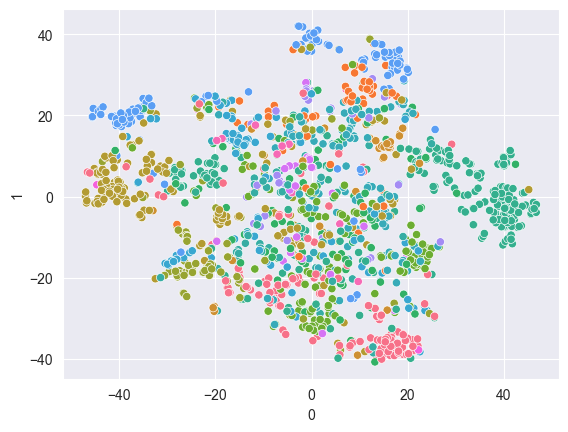

In [8]:
import seaborn as sns
p = sns.scatterplot(x=reduced.iloc[0], y=reduced.iloc[1], hue=metadata.loc['Sector'], legend=False)

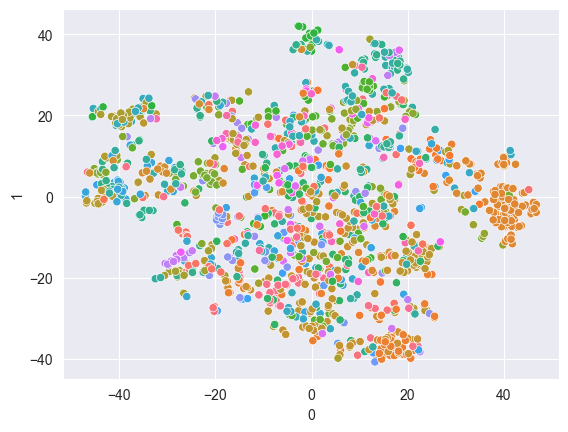

In [9]:
p = sns.scatterplot(x=reduced.iloc[0], y=reduced.iloc[1], hue=metadata.loc['Industry'], legend=False)

In [10]:
reduced

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,XRX,XYL,YELP,YUM,ZBH,ZBRA,ZD,ZION,ZTS,ZWS
0,-8.615643,10.617326,18.330101,17.579638,-21.816372,24.078842,-43.156044,20.685938,-1.639188,-17.552624,...,-1.797571,7.229884,2.246070,-10.080517,-9.310997,-0.523377,5.404127,28.625622,-18.402666,10.429034
1,-26.188520,24.011845,15.410960,10.340549,-16.455811,-12.727640,-0.262668,9.314980,7.200025,-22.483988,...,7.456477,15.226160,-33.763607,3.825916,-21.615927,-2.758563,-15.025722,4.035010,3.321739,20.221350


In [11]:
dist = [sum(np.square(embd[stock] - embd['AAPL'])) for stock in embd.columns]
idx = np.argsort(dist)
embd.columns[idx][:10]

Index(['AAPL', 'AVGO', 'AMD', 'OLED', 'NVDA', 'ATR', 'MPWR', 'MU', 'BERY',
       'SAM'],
      dtype='object')